In [1]:
import sys
sys.path.insert(0, '../')
import numpy as np
import matplotlib.pyplot as plt 
from deepssfp import dataloader, view, recon, dataset, dataformatter, deepssfp, models

In [2]:
ds = dataset.Dataset.load()

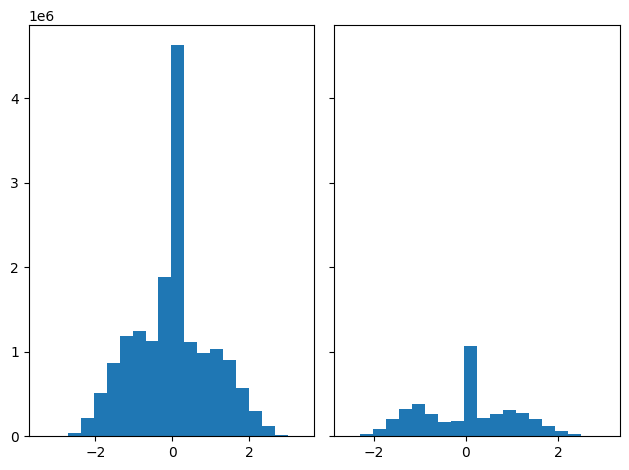

In [3]:
ds.histogram()

(1, 128, 128, 8) (1, 128, 128, 2)


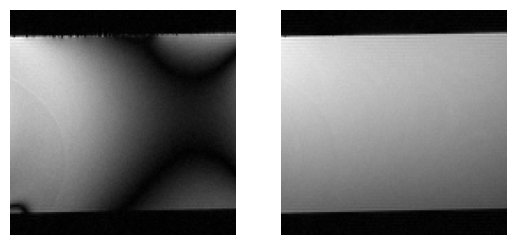

In [4]:
x, y = ds.next_batch(1)
print(x.shape, y.shape)
x = x[0,:,:,0] + 1j * x[0,:,:,1]
y = y[0,:,:,0] + 1j * y[0,:,:,1]
plt.subplot(1, 2, 1)
plt.imshow(np.abs(x), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np.abs(y), cmap='gray')
plt.axis('off')
plt.show()

In [5]:
model, history, evaluation, predictions = deepssfp.train(epochs=400)

Training DataSet: (102, 128, 128, 8) (102, 128, 128, 2)
Test DataSet: (26, 128, 128, 8) (26, 128, 128, 2)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 128, 128, 8  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  2336        ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']      

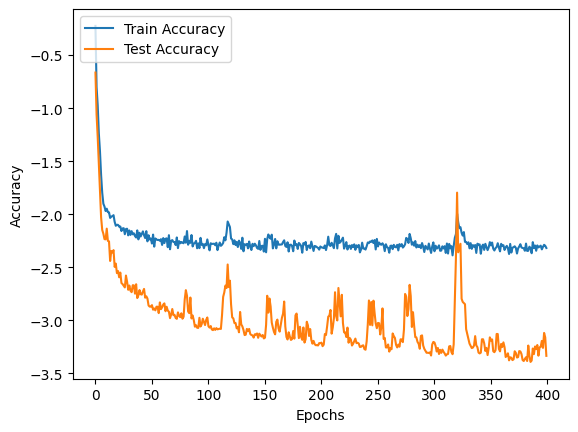

In [6]:
# Plot Accuracy 
plt.plot(np.log10(history.history['loss']), label='loss')
plt.plot(np.log10(history.history['val_loss']), label='val_loss')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train Accuracy", "Test Accuracy"], loc="upper left")
plt.show()

In [7]:
ds.x_test.shape, ds.y_test.shape, predictions.shape

((26, 128, 128, 8), (26, 128, 128, 2), (26, 128, 128, 2))

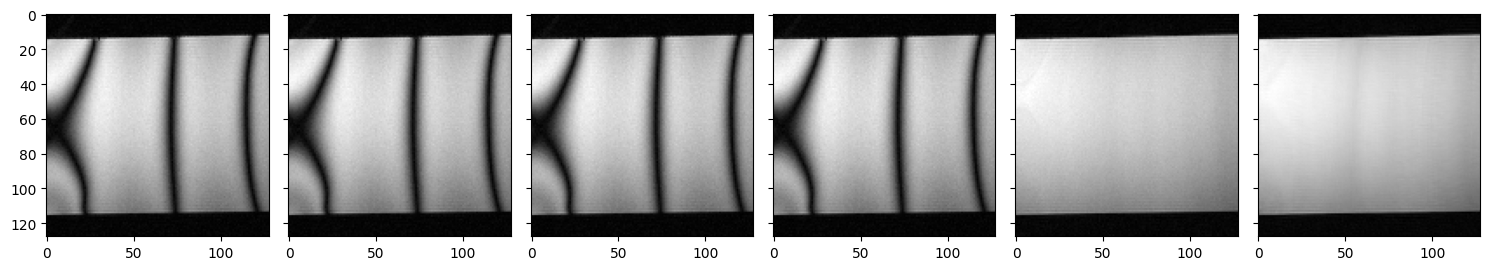

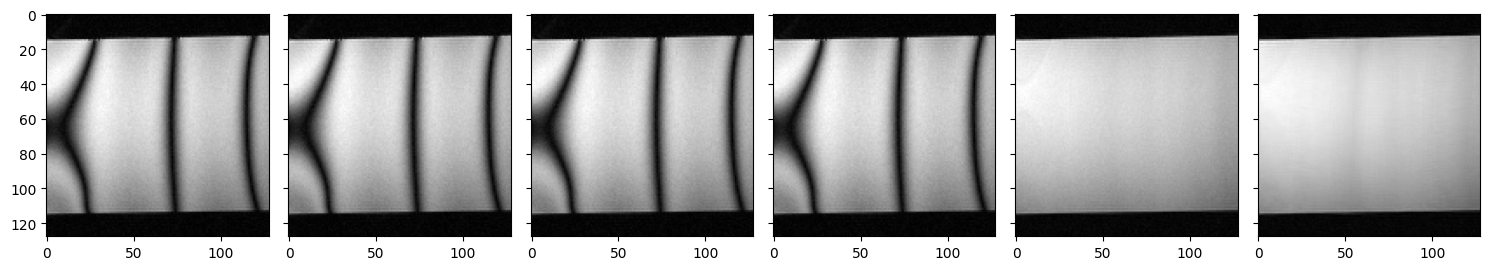

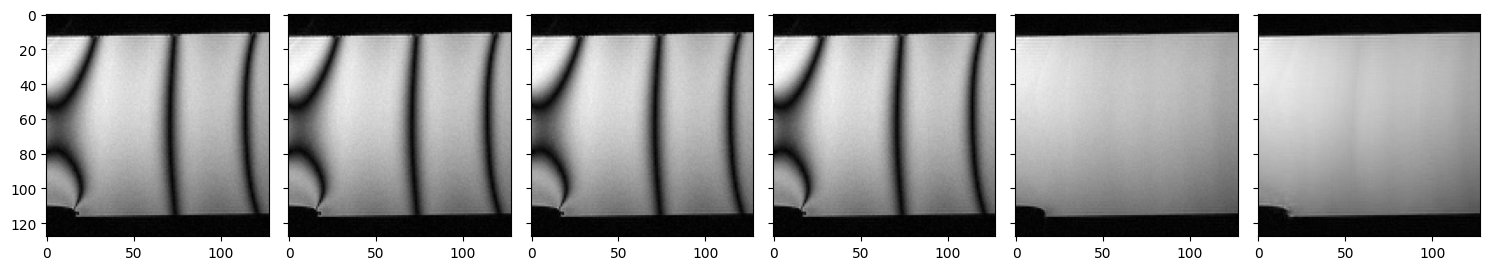

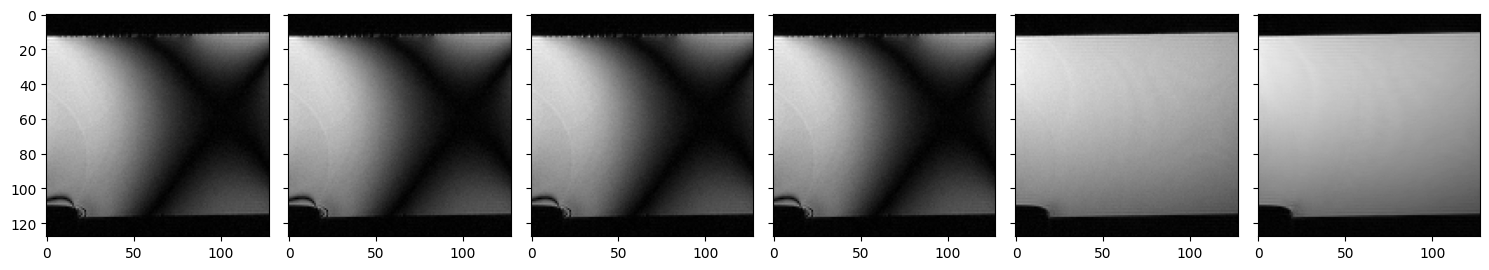

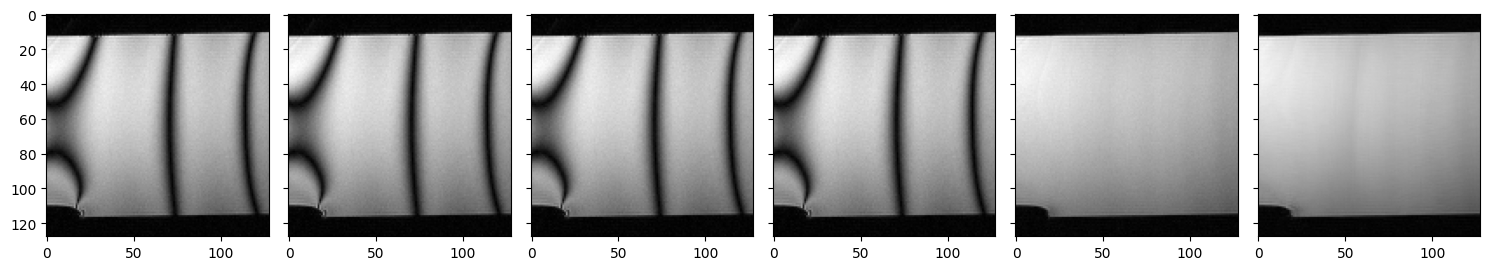

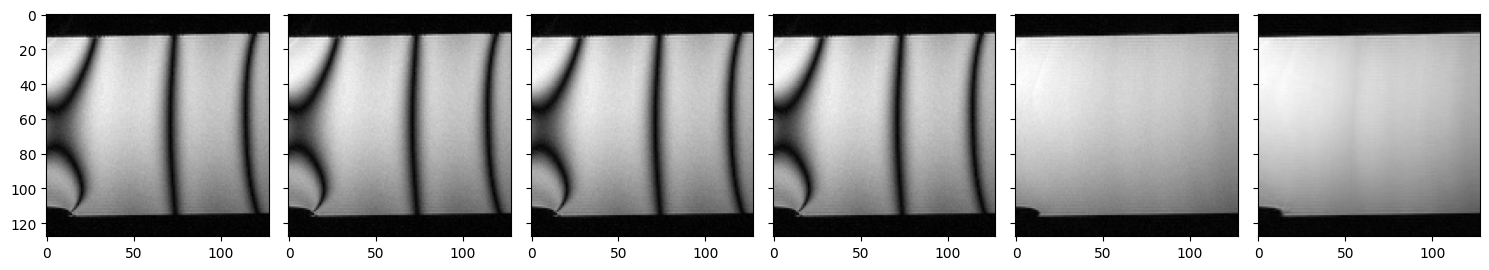

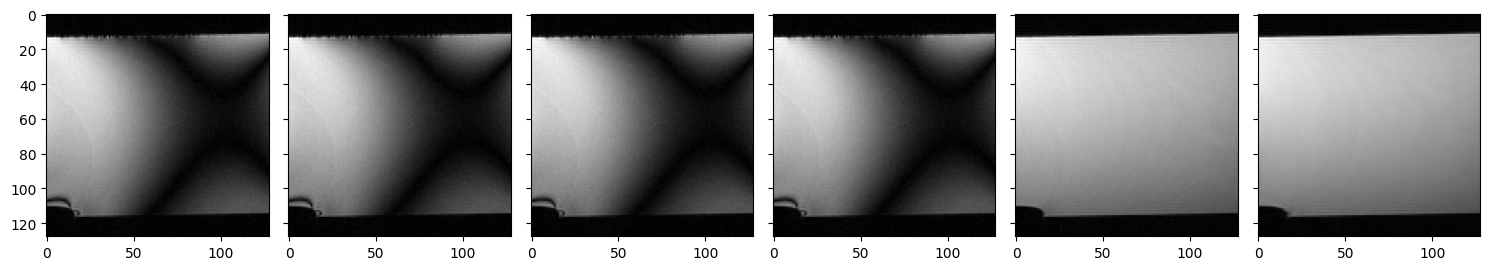

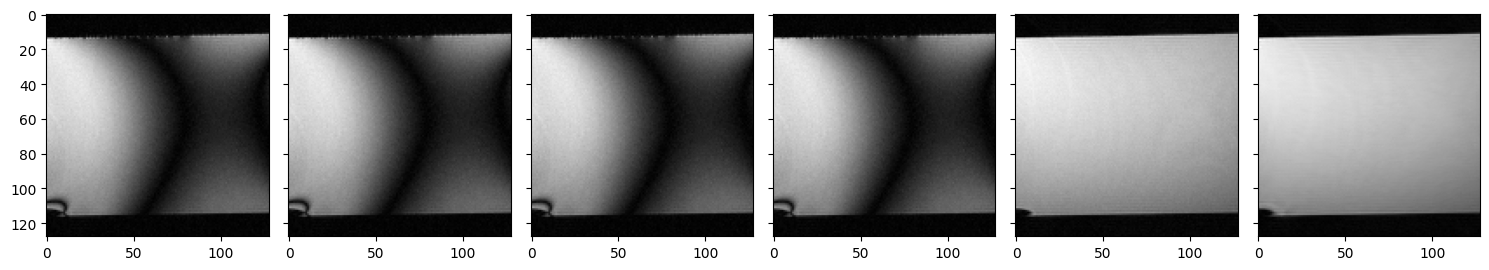

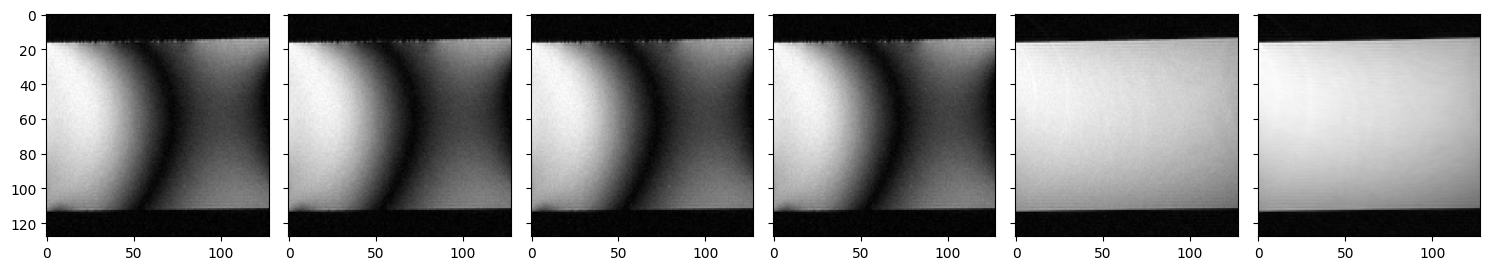

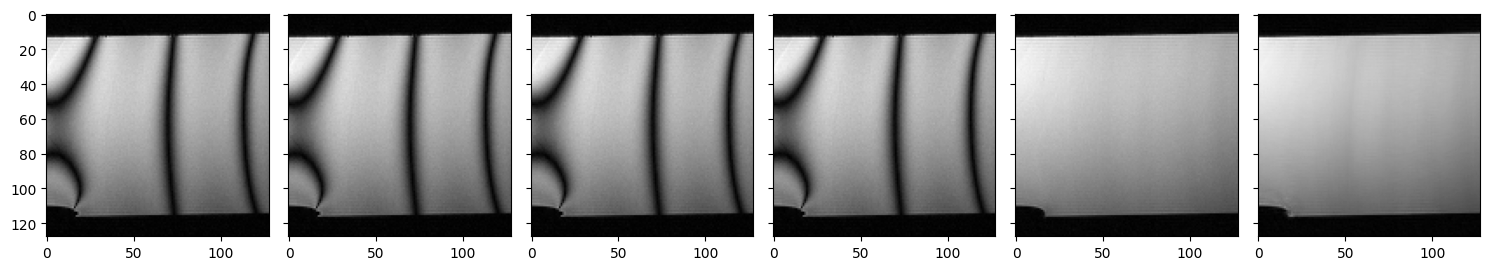

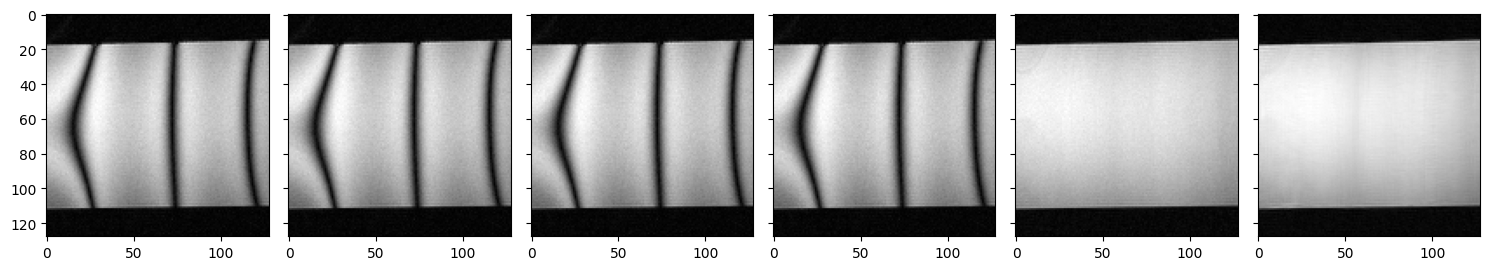

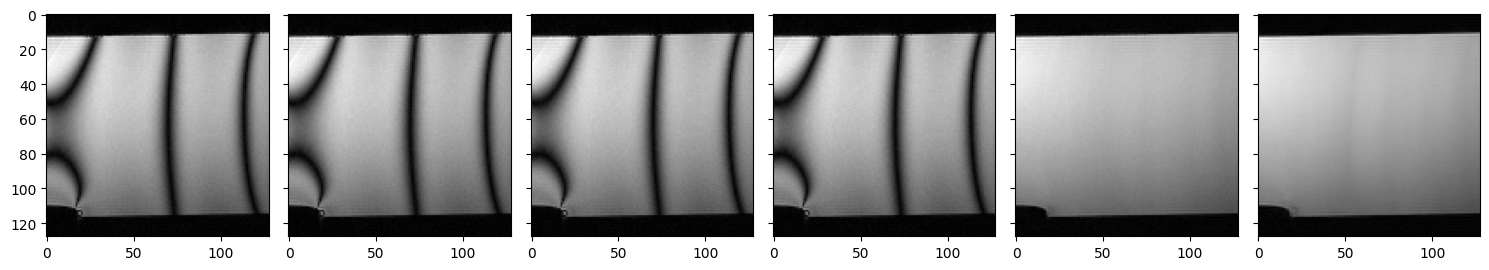

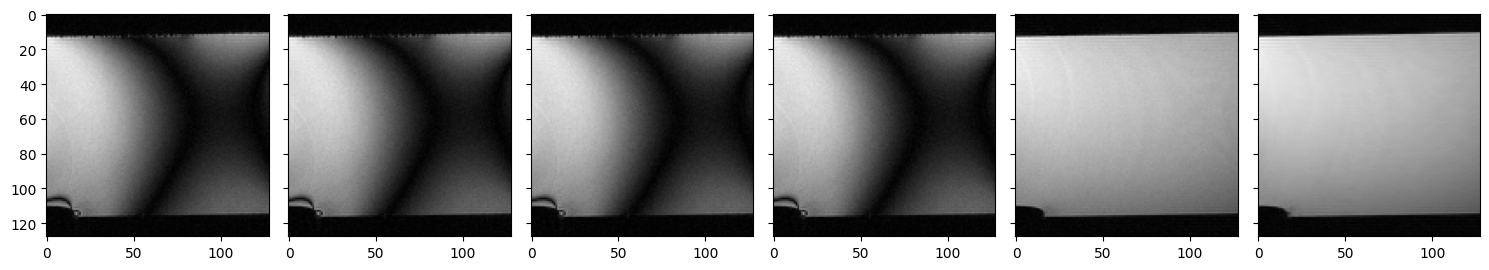

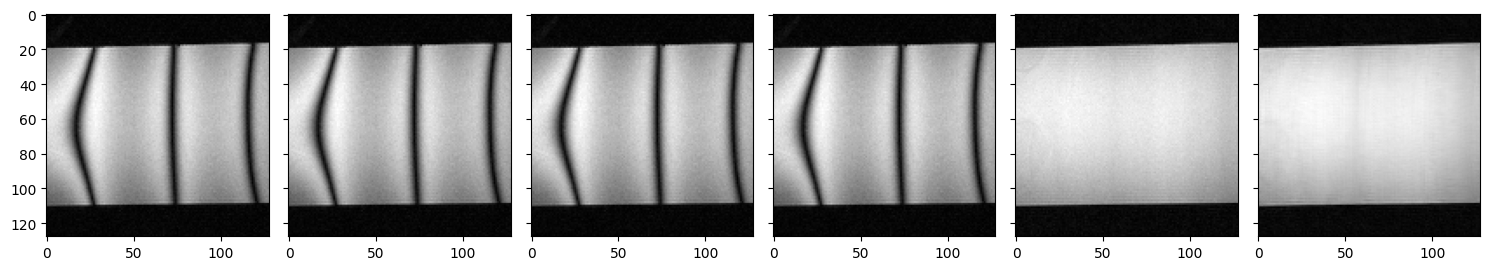

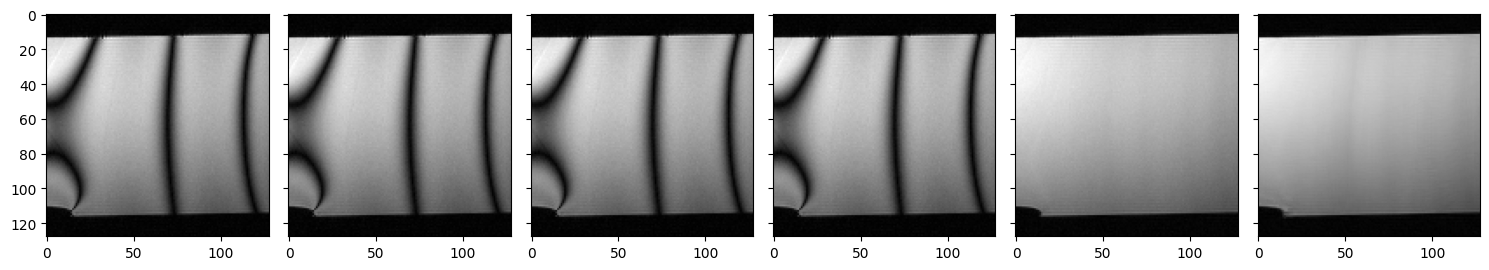

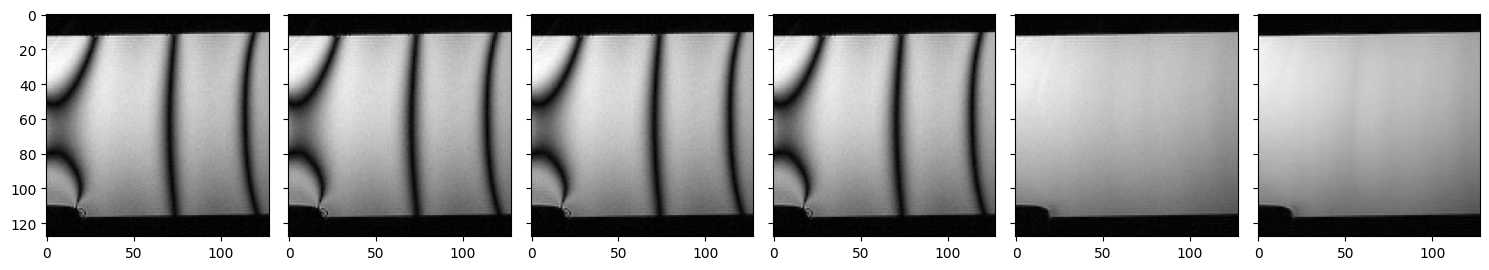

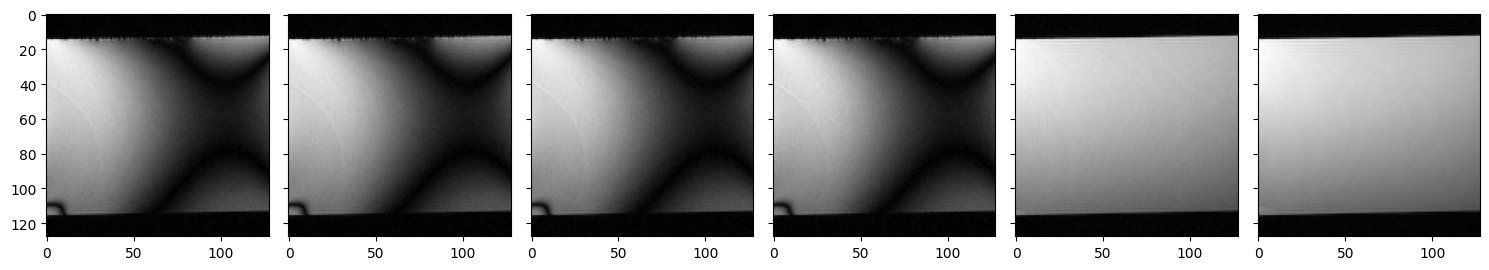

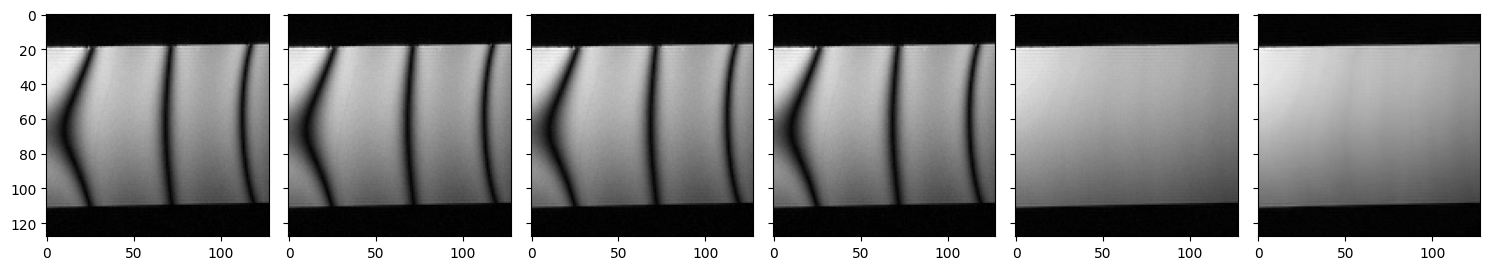

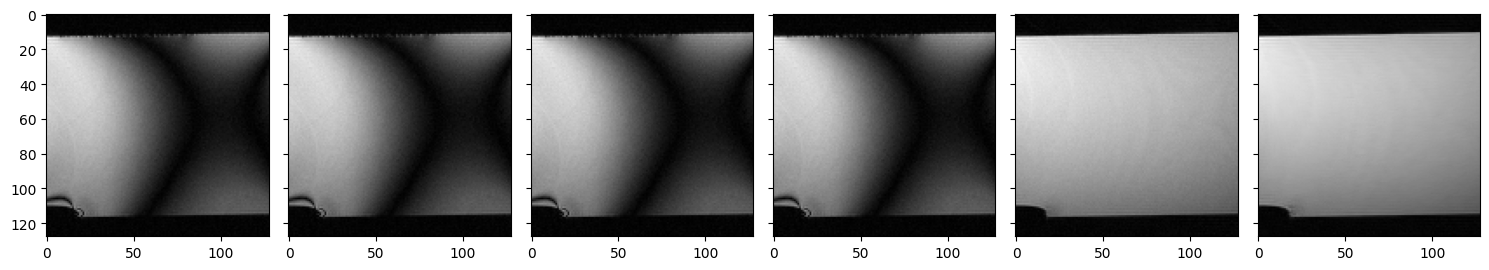

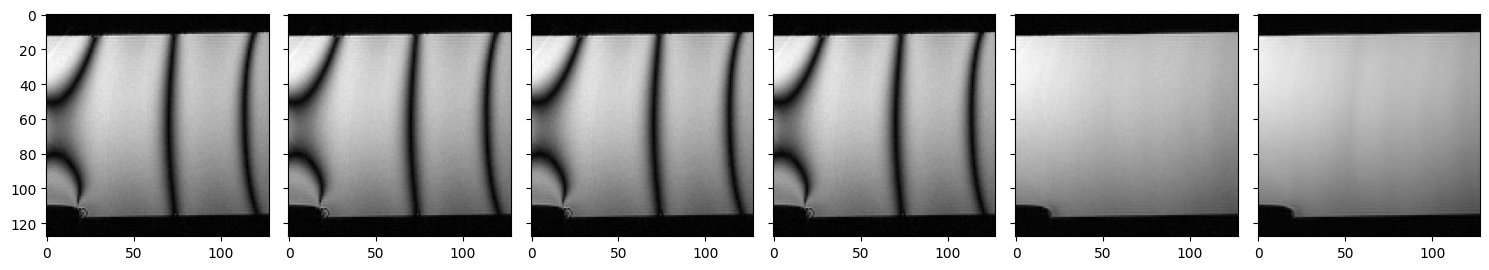

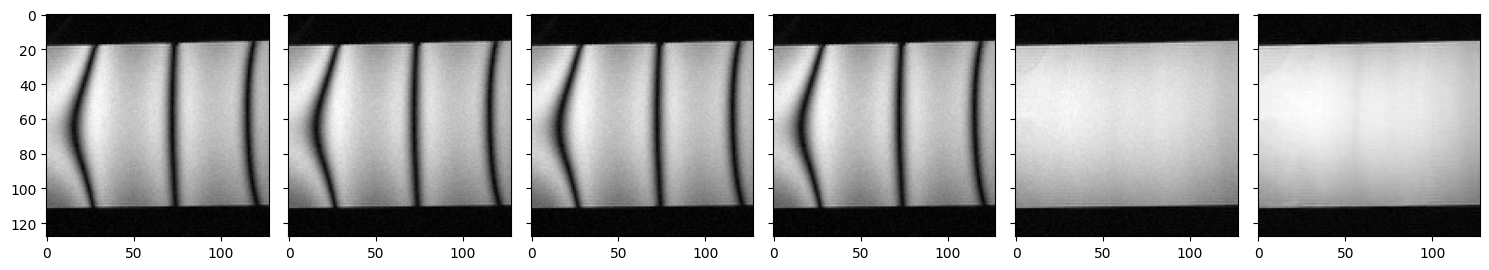

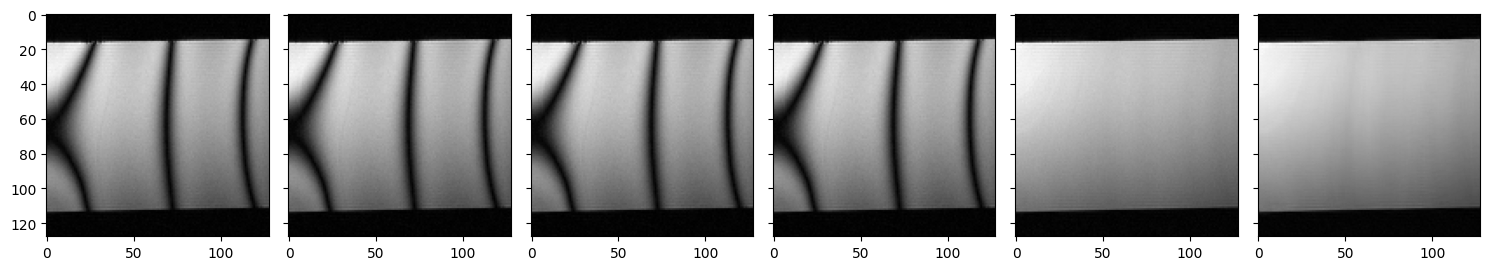

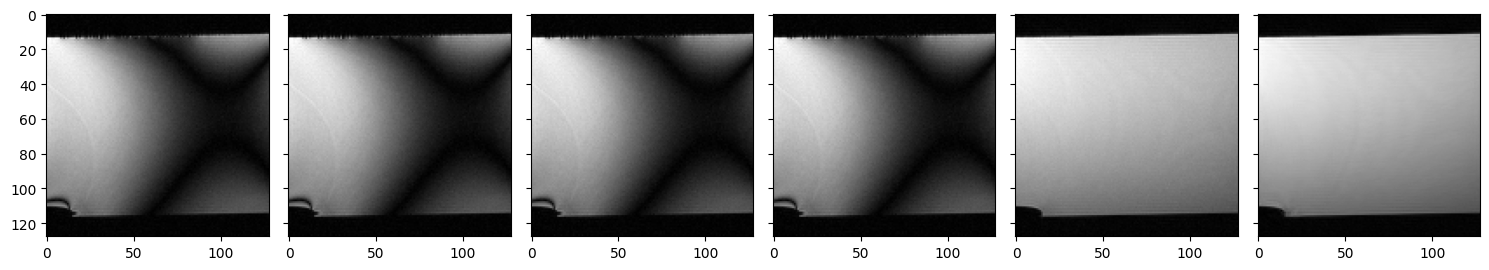

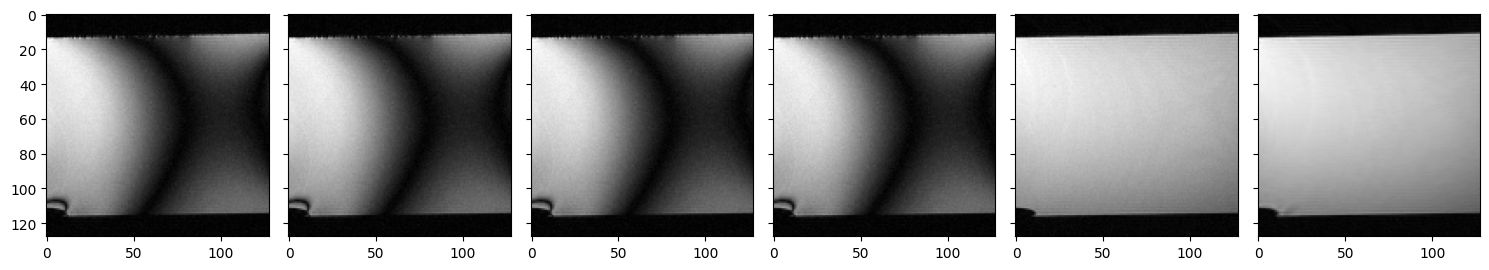

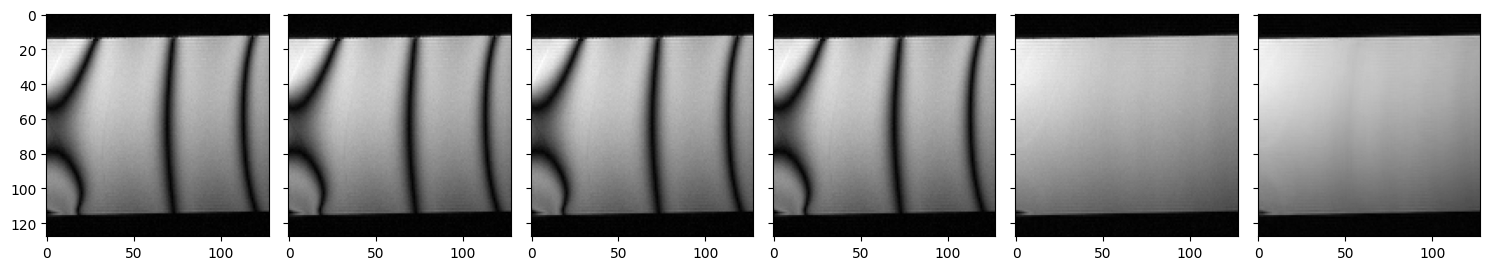

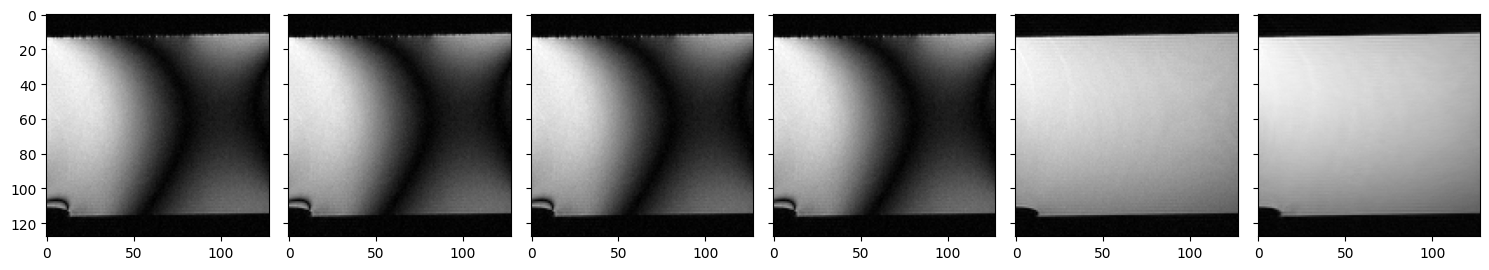

In [27]:
def plot(index):
    x = ds.x_test; y = ds.y_test; z = predictions
    x0 = x[index,:,:,0] + 1j * x[index,:,:,1]
    x1 = x[index,:,:,0] + 1j * x[index,:,:,1]
    x2 = x[index,:,:,0] + 1j * x[index,:,:,1]
    x3 = x[index,:,:,0] + 1j * x[index,:,:,1]
    y = y[index,:,:,0] + 1j * y[index,:,:,1]
    z = z[index,:,:,0] + 1j * z[index,:,:,1]

    fig, axs = plt.subplots(1, 6, sharey=True, tight_layout=True, figsize=(15, 15))
    axs[0].imshow(np.abs(x0), cmap='gray')
    axs[1].imshow(np.abs(x1), cmap='gray')
    axs[2].imshow(np.abs(x2), cmap='gray')
    axs[3].imshow(np.abs(x3), cmap='gray')
    axs[4].imshow(np.abs(y), cmap='gray')
    axs[5].imshow(np.abs(z), cmap='gray')
    plt.show()

for i in range(26):
    plot(i)
